In [1]:
import pandas as pd
from sqlalchemy import create_engine
import pymysql
import json
import pandas as pd
import numpy
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

#from config import local_db_user, local_db_pwd, local_db_endpoint, local_db_port, local_db_name
from config import remote_db_endpoint, remote_db_port, remote_db_user, remote_db_pwd, remote_db_name

In [2]:
cloud_engine = create_engine(f"postgresql://{remote_db_user}:{remote_db_pwd}@{remote_db_endpoint}:{remote_db_port}/{remote_db_name}")

In [3]:
cloud_conn = cloud_engine.connect()

In [4]:
africa_data = pd.read_sql("select * from ultimate where year = 2018", cloud_conn)

In [5]:
africa_data.dtypes

country_name                            object
country_code                            object
year                                     int64
conflict_frequency_code                  int64
conflict_deaths_code                   float64
population_density                     float64
population_growth_annual_per           float64
total_population                       float64
refugee_pop_origin                      object
rural_population                       float64
rural_population_per                   float64
rural_population_growth                float64
urban_population                       float64
urban_population_per                   float64
urban_population_growth                float64
corruption_control_estimate            float64
corruption_control_percentile          float64
government _effectiveness_est          float64
government_effectiveness_percentile    float64
stability_est                          float64
stability_percentile                   float64
regulatory_es

In [6]:
africa_data.columns

Index(['country_name', 'country_code', 'year', 'conflict_frequency_code',
       'conflict_deaths_code', 'population_density',
       'population_growth_annual_per', 'total_population',
       'refugee_pop_origin', 'rural_population', 'rural_population_per',
       'rural_population_growth', 'urban_population', 'urban_population_per',
       'urban_population_growth', 'corruption_control_estimate',
       'corruption_control_percentile', 'government _effectiveness_est',
       'government_effectiveness_percentile', 'stability_est',
       'stability_percentile', 'regulatory_est', 'regulatory_percentile',
       'ruleoflaw_est', 'ruleoflaw_percentile', 'accountability_est',
       'accountability_percentile ', 'ethnic_score', 'gdp_growth_per',
       'gdp_percap_per', 'mortality_rate', 'gdp_total', 'gdp_percap',
       'gni_total', 'fdi_inflows_gdp', 'fdi_inflows_total',
       'conflict_fatalities', 'conflict_events'],
      dtype='object')

In [7]:
africa_econ=africa_data[['gdp_growth_per','gdp_percap_per', 'gdp_total', 'gdp_percap', 'gni_total', 'fdi_inflows_gdp', 'fdi_inflows_total', 'conflict_fatalities']]
africa_econ.head()

,gdp_growth_per,gdp_percap_per,gdp_total,gdp_percap,gni_total,fdi_inflows_gdp,fdi_inflows_total,conflict_fatalities
0,1.40,-0.62,1.740000e+11,4114.72,1.690000e+11,0.87,1506316886,66
1,-2.00,-5.16,1.010000e+11,3289.65,9.352368e+10,-6.37,-6456076413,41
2,6.70,3.82,1.425099e+10,1240.83,1.410597e+10,0.99,140607612,30
3,4.48,2.21,1.866326e+10,8279.60,1.724791e+10,1.23,228718291,1
4,6.82,3.80,1.619943e+10,820.16,1.571881e+10,1.66,268414908,303


In [8]:
X=africa_econ[['gdp_growth_per','gdp_percap_per', 'gdp_total', 'gdp_percap', 'gni_total', 'fdi_inflows_gdp', 'fdi_inflows_total',]]
y=africa_econ['conflict_fatalities'].values.reshape(-1,1)
print(X.shape, y.shape)

(52, 7) (52, 1)


In [9]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [10]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

X_train.head()

,gdp_growth_per,gdp_percap_per,gdp_total,gdp_percap,gni_total,fdi_inflows_gdp,fdi_inflows_total
6,4.53,3.33,1.966983e+09,3617.33,1.920636e+09,5.49,107974094
34,3.43,0.46,1.471722e+10,498.96,1.442168e+10,18.20,2678190544
4,6.82,3.80,1.619943e+10,820.16,1.571881e+10,1.66,268414908
37,1.92,-0.68,3.980000e+11,2032.73,3.800000e+11,0.50,1997485165
24,6.32,3.89,8.777858e+10,1707.99,8.632936e+10,1.85,1625921494


In [11]:
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [12]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

print(X_train_scaled)

[[ 2.73980693e-01  5.50507599e-01 -5.44628636e-01  2.66241326e-01
  -5.44047589e-01  1.82999503e-01 -3.96702239e-01]
 [-4.46360522e-02 -2.41196314e-01 -3.96098721e-01 -7.12200753e-01
  -3.92890437e-01  2.04986560e+00  1.10058261e+00]
 [ 9.37282827e-01  6.80159459e-01 -3.78832165e-01 -6.11418744e-01
  -3.77206092e-01 -3.79557314e-01 -3.03237115e-01]
 [-4.82009948e-01 -5.55671039e-01  4.06883359e+00 -2.30954106e-01
   4.02752217e+00 -5.49940058e-01  7.04036296e-01]
 [ 7.92457034e-01  7.04986411e-01  4.55006639e-01 -3.32846852e-01
   4.76585638e-01 -3.51649796e-01  4.87581120e-01]
 [-8.09316242e-01 -5.25326987e-01  3.71935801e+00  1.13120324e+00
   3.74941626e+00 -4.01589565e-01  2.78489890e+00]
 [-1.72082750e-01  9.81053630e-02  8.07061543e-01  1.42262510e-01
   8.23258458e-01 -1.81267052e-01  1.60518725e+00]
 [ 7.46112780e-01  2.60859826e-01 -1.85765669e-01 -6.28067229e-01
  -1.82198620e-01 -1.50421900e-01  1.55195484e-01]
 [-2.90839901e-01 -2.82574567e-01 -5.00955599e-01 -6.27392629e-0

In [13]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
X_train_scaled[0]

array([ 0.27398069,  0.5505076 , -0.54462864,  0.26624133, -0.54404759,
        0.1829995 , -0.39670224])

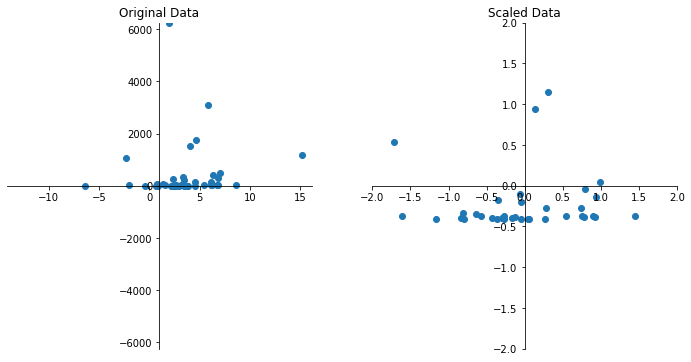

In [15]:
fig1 = plt.figure(figsize=(12, 6))
axes1 = fig1.add_subplot(1, 2, 1)
axes2 = fig1.add_subplot(1, 2, 2)

axes1.set_title("Original Data")
axes2.set_title("Scaled Data")

maxx = X_train['gdp_growth_per'].max()
maxy = y_train.max()
axes1.set_xlim(-maxx + 1, maxx + 1)
axes1.set_ylim(-maxy + 1, maxy + 1)

axes2.set_xlim(-2, 2)
axes2.set_ylim(-2, 2)

def set_axes(ax):
    ax.spines['left'].set_position('center')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('center')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    
set_axes(axes1)
set_axes(axes2)

axes1.scatter(X_train['gdp_growth_per'], y_train)
axes2.scatter(X_train_scaled[:,0], y_train_scaled[:])

In [16]:
from sklearn.metrics import mean_squared_error

predictions = model.predict(X_test_scaled)
MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.37574718563271986, R2: -0.6441423502778698


In [17]:
summodel = sm.OLS(y, X)
results = summodel.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.526
Model:                            OLS   Adj. R-squared (uncentered):              0.452
Method:                 Least Squares   F-statistic:                              7.131
Date:                Tue, 01 Sep 2020   Prob (F-statistic):                    9.80e-06
Time:                        19:39:42   Log-Likelihood:                         -418.31
No. Observations:                  52   AIC:                                      850.6
Df Residuals:                      45   BIC:                                      864.3
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------